##### Imports

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [83]:
VERSION = '2nd_test_plots' # spread.shifting.hedging.position.liquidity
PATH = f'{VERSION}/'
try:
    os.mkdir(PATH)
except:
    print('Directory already exists')

### Visualisations

##### 2nd Test Round Analysis

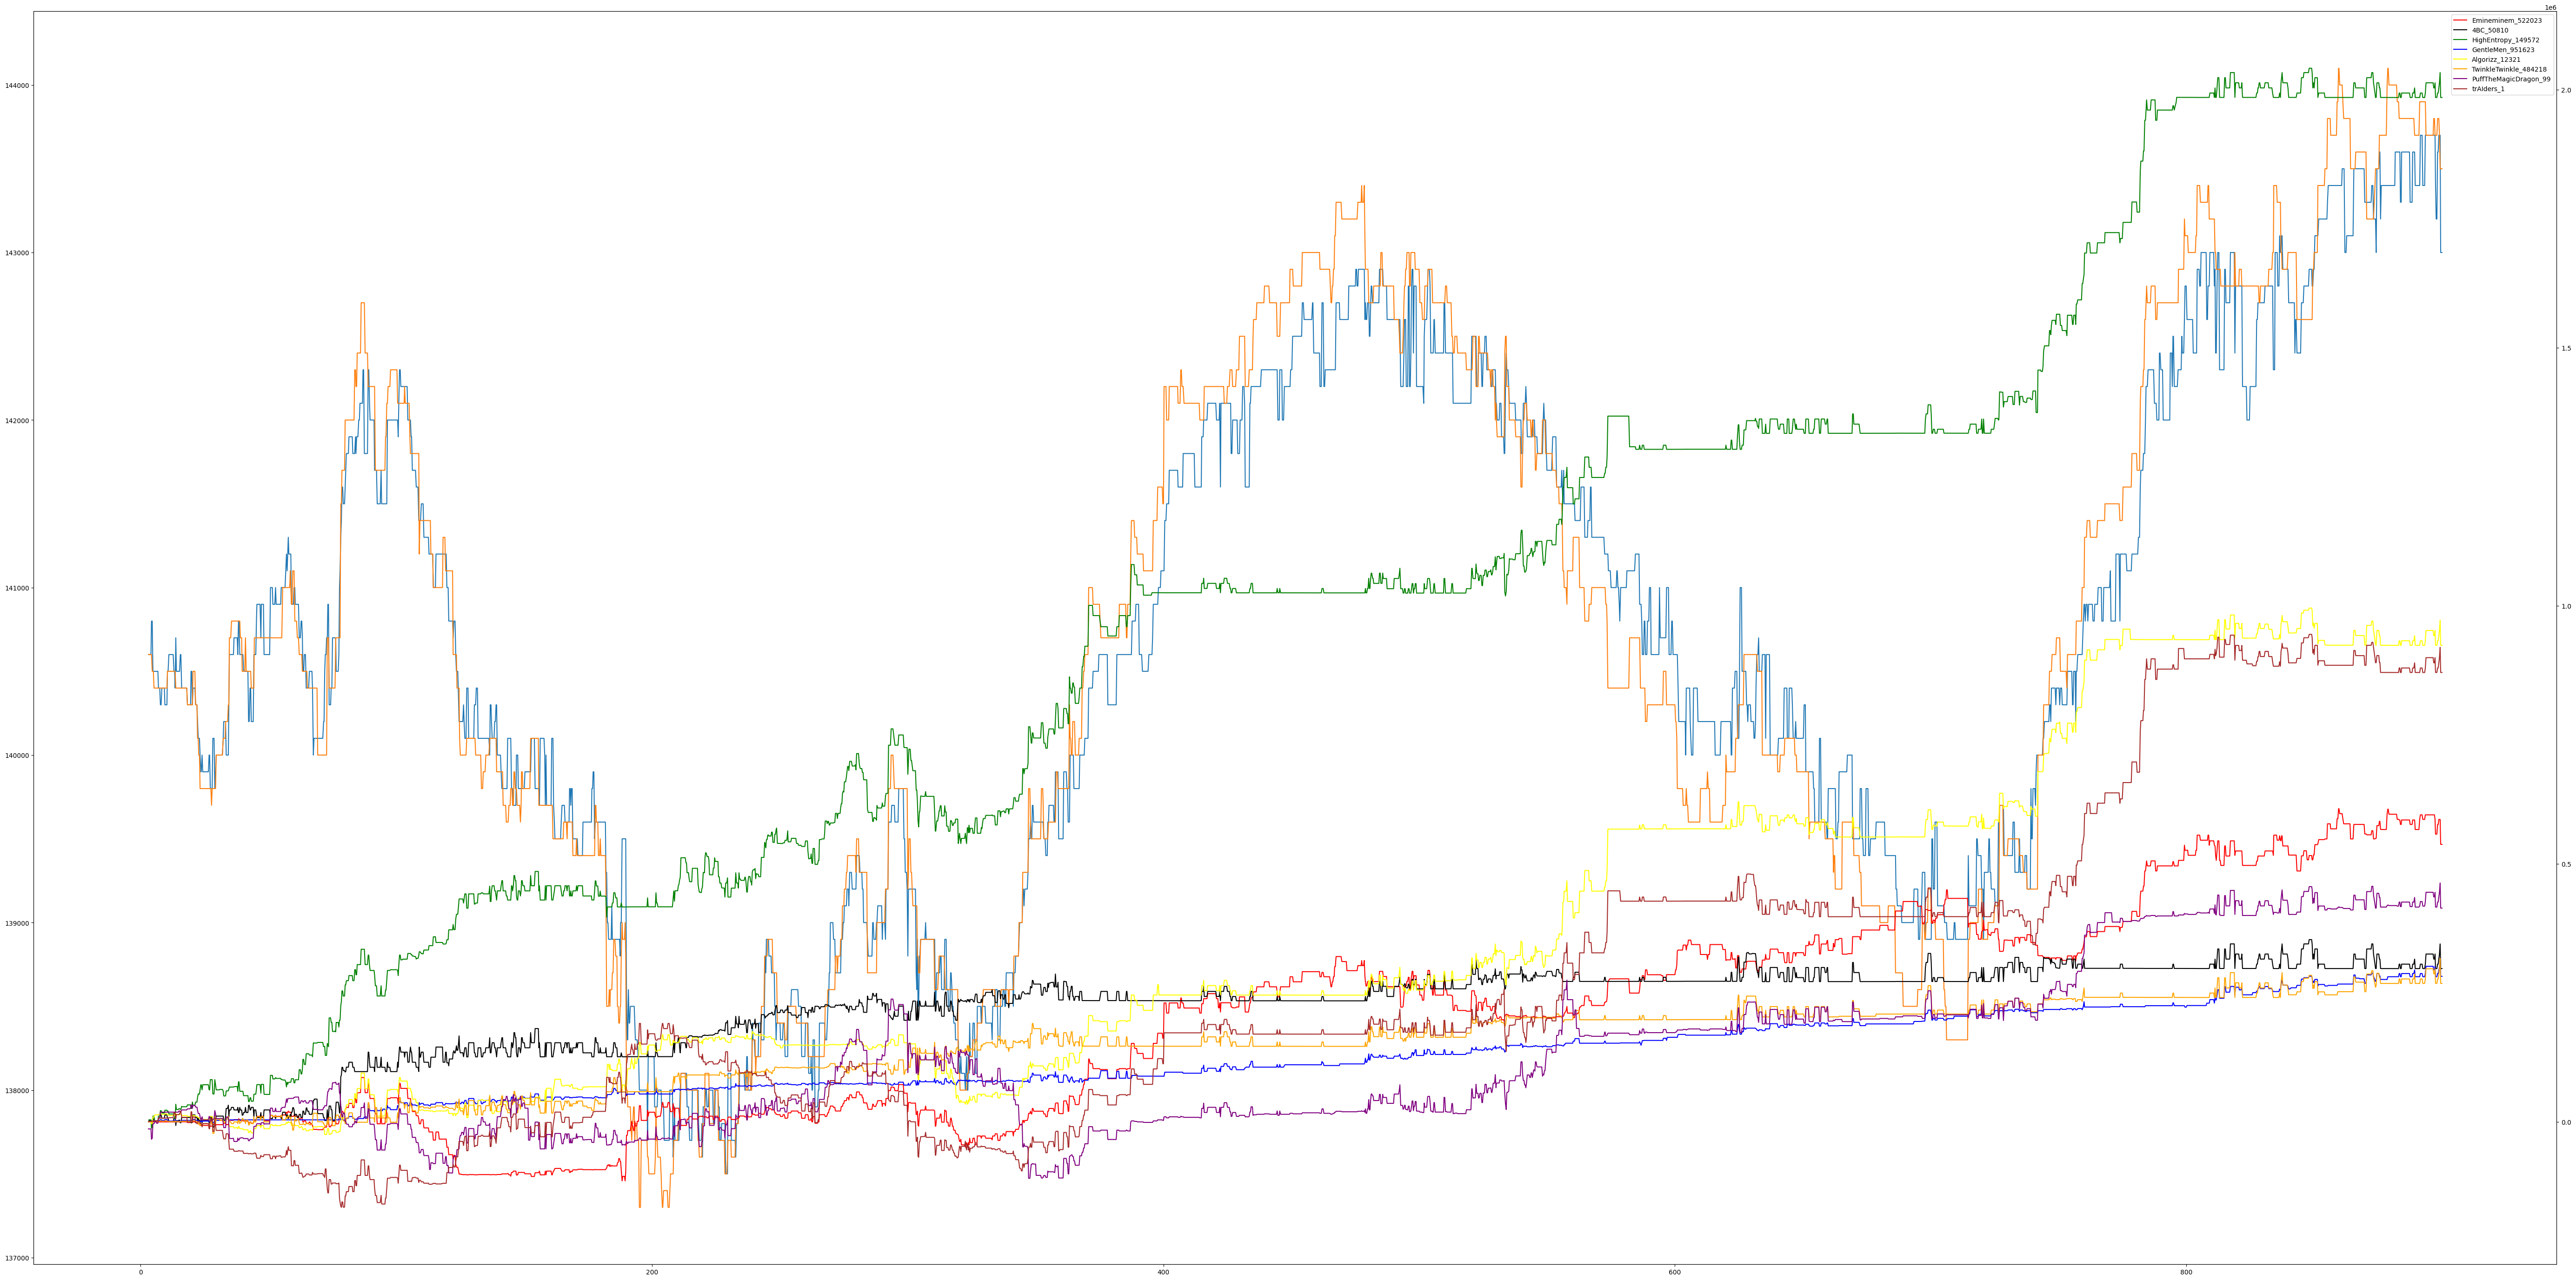

In [90]:
df = pd.read_csv('2nd_test/match249_score_board.csv')
# 775 - 852
df.head()
df = df[100:]
# df = df[df['Time'] >= 550]
plt.plot(df['Time'], df['EtfPrice'], label='EtfPrice')
plt.plot(df['Time'], df['FuturePrice'], label='FuturePrice')

df1 = df[df['Team'] == 'Emineminem_522023']
df2 = df[df['Team'] == '4BC_50810']
df3 = df[df['Team'] == 'HighEntropy_149572']
df4 = df[df['Team'] == 'GentleMen_951623']
df5 = df[df['Team'] == 'Algorizz_12321']
df6 = df[df['Team'] == 'TwinkleTwinkle_484218']
df7 = df[df['Team'] == 'PuffTheMagicDragon_99']
df8 = df[df['Team'] == 'trAIders_1']
ax2 = plt.twinx()
ax2.plot(df1['Time'], df1['ProfitOrLoss'], label='Emineminem_522023', color='red')
ax2.plot(df2['Time'], df2['ProfitOrLoss'], label='4BC_50810', color='black')
ax2.plot(df3['Time'], df3['ProfitOrLoss'], label='HighEntropy_149572', color='green')
ax2.plot(df4['Time'], df4['ProfitOrLoss'], label='GentleMen_951623', color='blue')
ax2.plot(df5['Time'], df5['ProfitOrLoss'], label='Algorizz_12321', color='yellow')
ax2.plot(df6['Time'], df6['ProfitOrLoss'], label='TwinkleTwinkle_484218', color='orange')
ax2.plot(df7['Time'], df7['ProfitOrLoss'], label='PuffTheMagicDragon_99', color='purple')
ax2.plot(df8['Time'], df8['ProfitOrLoss'], label='trAIders_1', color='brown')
plt.rcParams["figure.figsize"] = (70,35)
plt.legend()
plt.savefig(PATH + 'match249_p&l.png')
plt.show()

##### Bid-Ask Spread against position

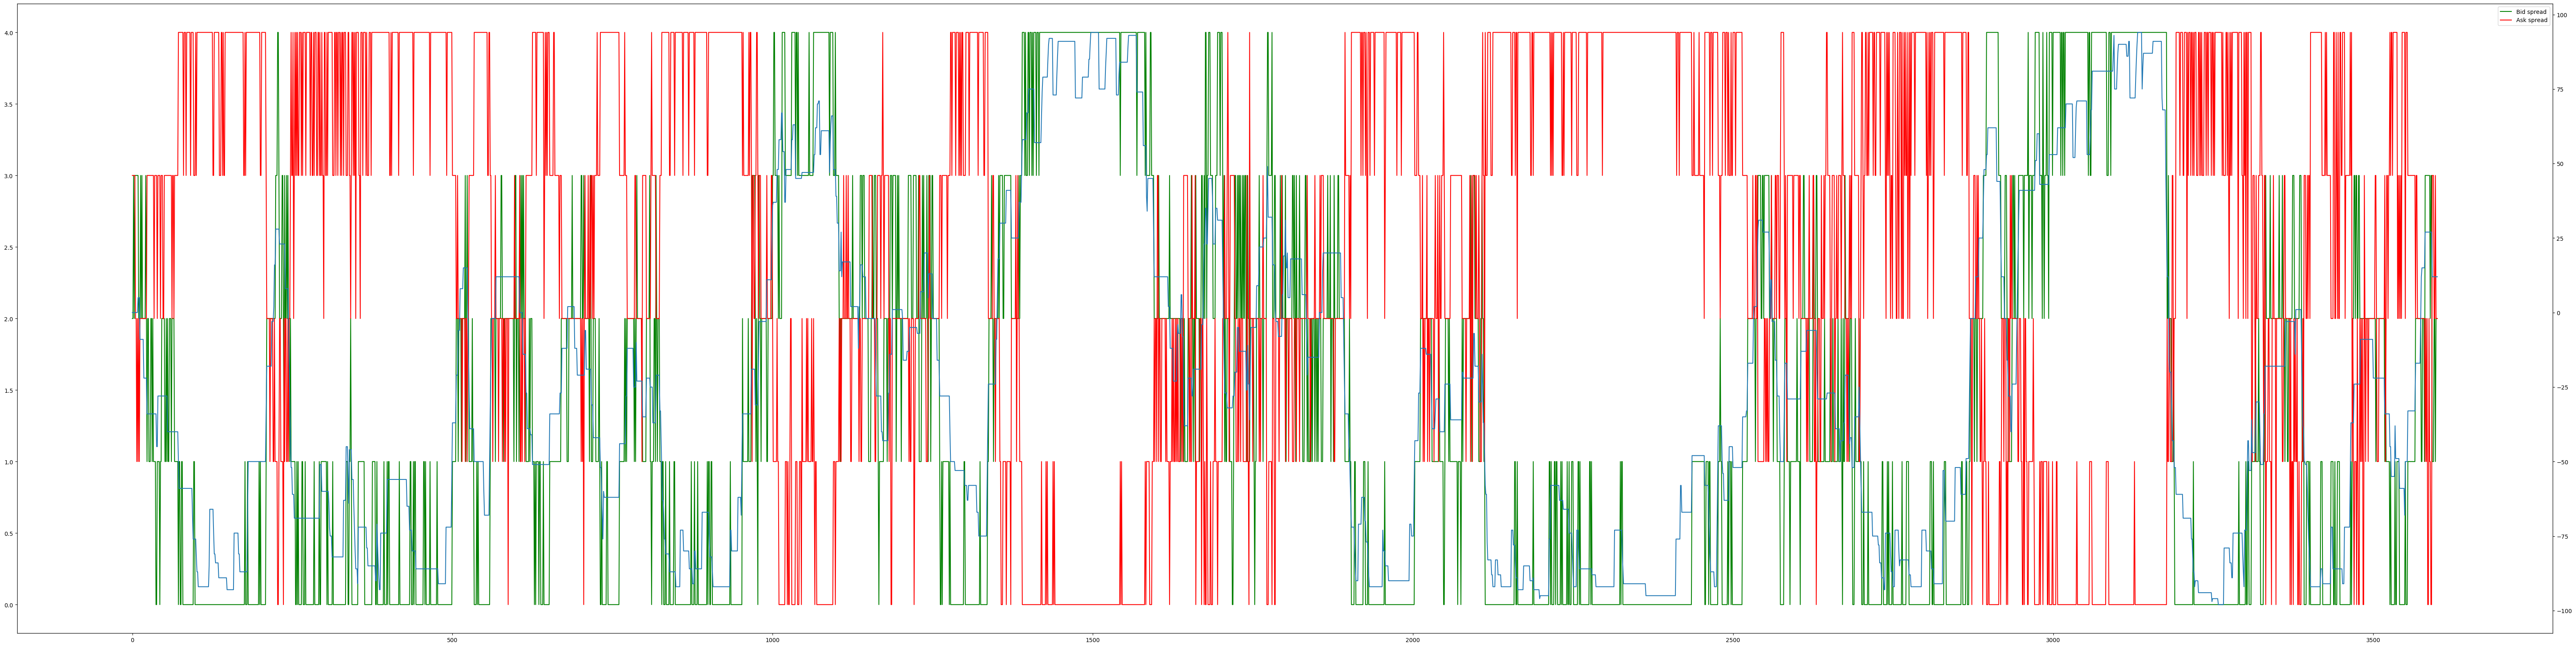

In [46]:
inputs = pd.read_csv('../output/inputs.csv')

# Drop the first 500 rows
# inputs = inputs.iloc[500:][::4] 



plt.plot(inputs.index, inputs['bid_spread'], label='Bid spread', color='green')
plt.plot(inputs.index, inputs['ask_spread'], label='Ask spread', color='red')
plt.legend()
plt2 = plt.twinx()
plt2.plot(inputs.index, inputs['position'], label='Position')

# plt3 = plt.twinx()
# plt3.plot(inputs.index, inputs['bid_liquidity'], label='Spread')

plt.rcParams["figure.figsize"] = (80,20)
plt.savefig(f'{PATH}spread-position.png')
plt.show()

##### Market against positions

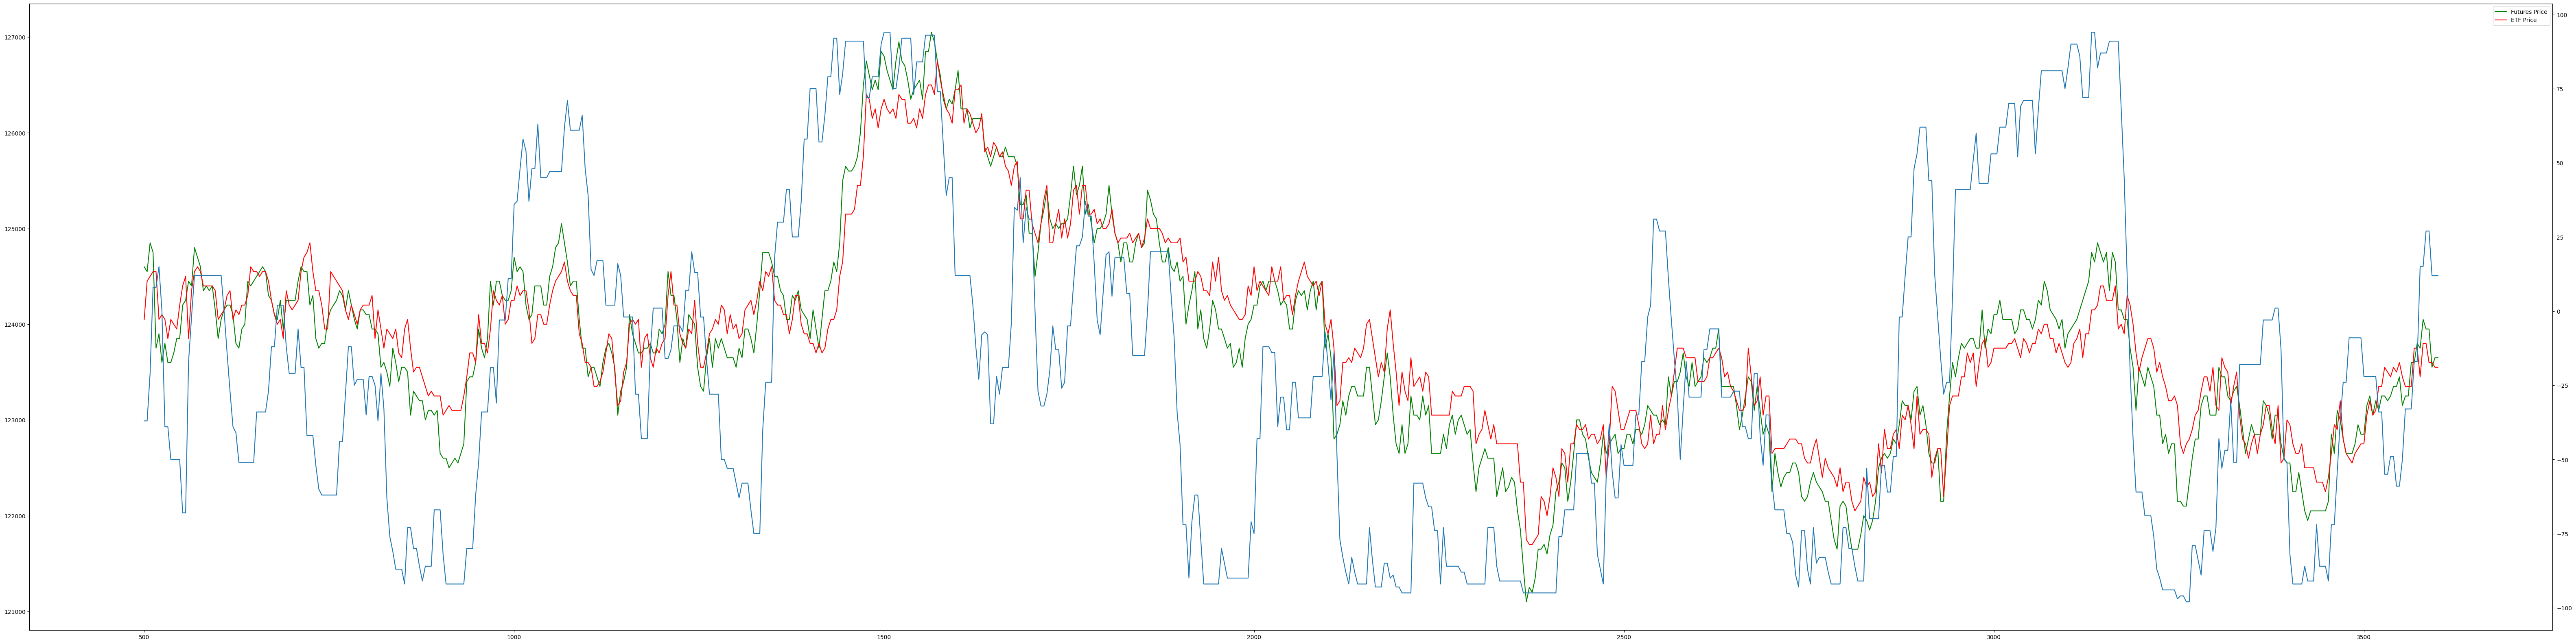

In [47]:
inputs = pd.read_csv('../output/inputs.csv')

# Drop the first 500 rows
inputs = inputs.iloc[500:][::4] 



plt.plot(inputs.index, inputs['avg_price'], label='Futures Price', color='green')
plt.plot(inputs.index, inputs['ETF_avg'], label='ETF Price', color='red')
plt.legend()
plt2 = plt.twinx()
plt2.plot(inputs.index, inputs['position'], label='Position')

# plt3 = plt.twinx()
# plt3.plot(inputs.index, inputs['bid_liquidity'], label='Spread')

plt.rcParams["figure.figsize"] = (80,20)
# plt.savefig(f'{PATH}market.png')
plt.show()

##### P&L against market

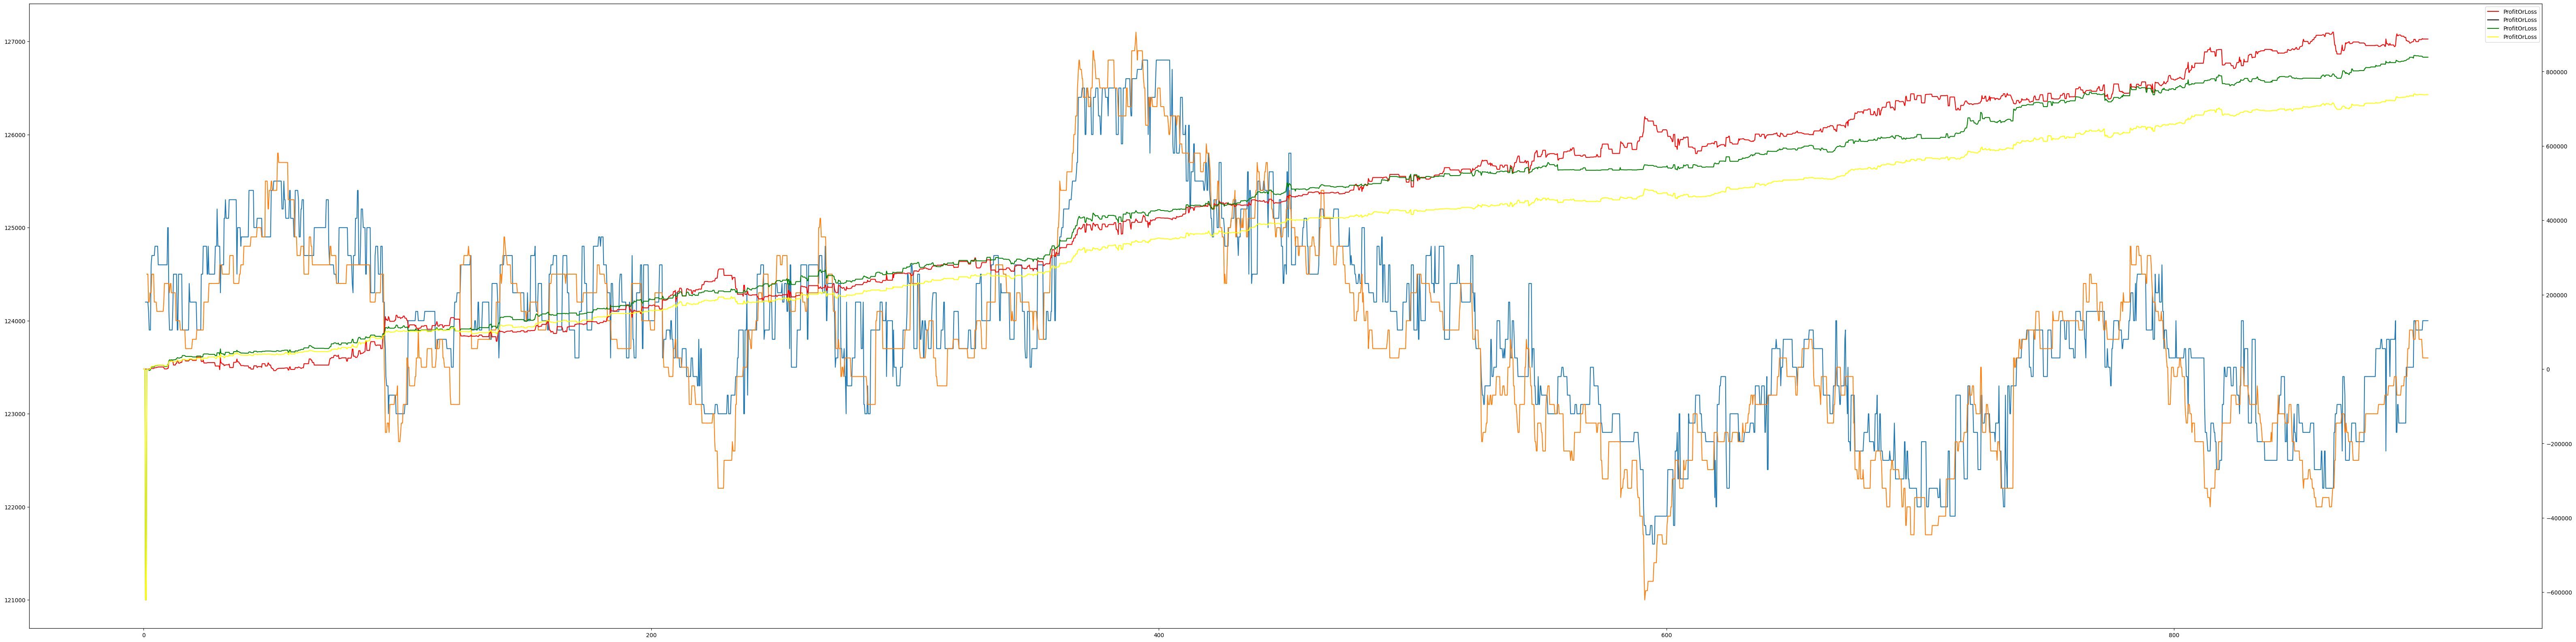

In [48]:
df = pd.read_csv('../score_board.csv')
df.head()
plt.plot(df['Time'], df['EtfPrice'], label='EtfPrice')
plt.plot(df['Time'], df['FuturePrice'], label='FuturePrice')

df1 = df[df['Team'] == 'Emineminem']
df2 = df[df['Team'] == 'AdvancedL']
ax2 = plt.twinx()
ax2.plot(df1['Time'], df1['ProfitOrLoss'], label='ProfitOrLoss', color='red')
ax2.plot(df2['Time'], df2['ProfitOrLoss'], label='ProfitOrLoss', color='black')
ax2.plot(df1['Time'], df[df['Team']=='SimpleL']['ProfitOrLoss'], label='ProfitOrLoss', color='green')
ax2.plot(df1['Time'], df[df['Team']=='Benchmark']['ProfitOrLoss'], label='ProfitOrLoss', color='yellow')
# only plot rows where Team is Team1
plt.rcParams["figure.figsize"] = (80,20)
plt.legend()
plt.savefig(PATH + 'p&l.png')
plt.show()


##### Investigating liquidity

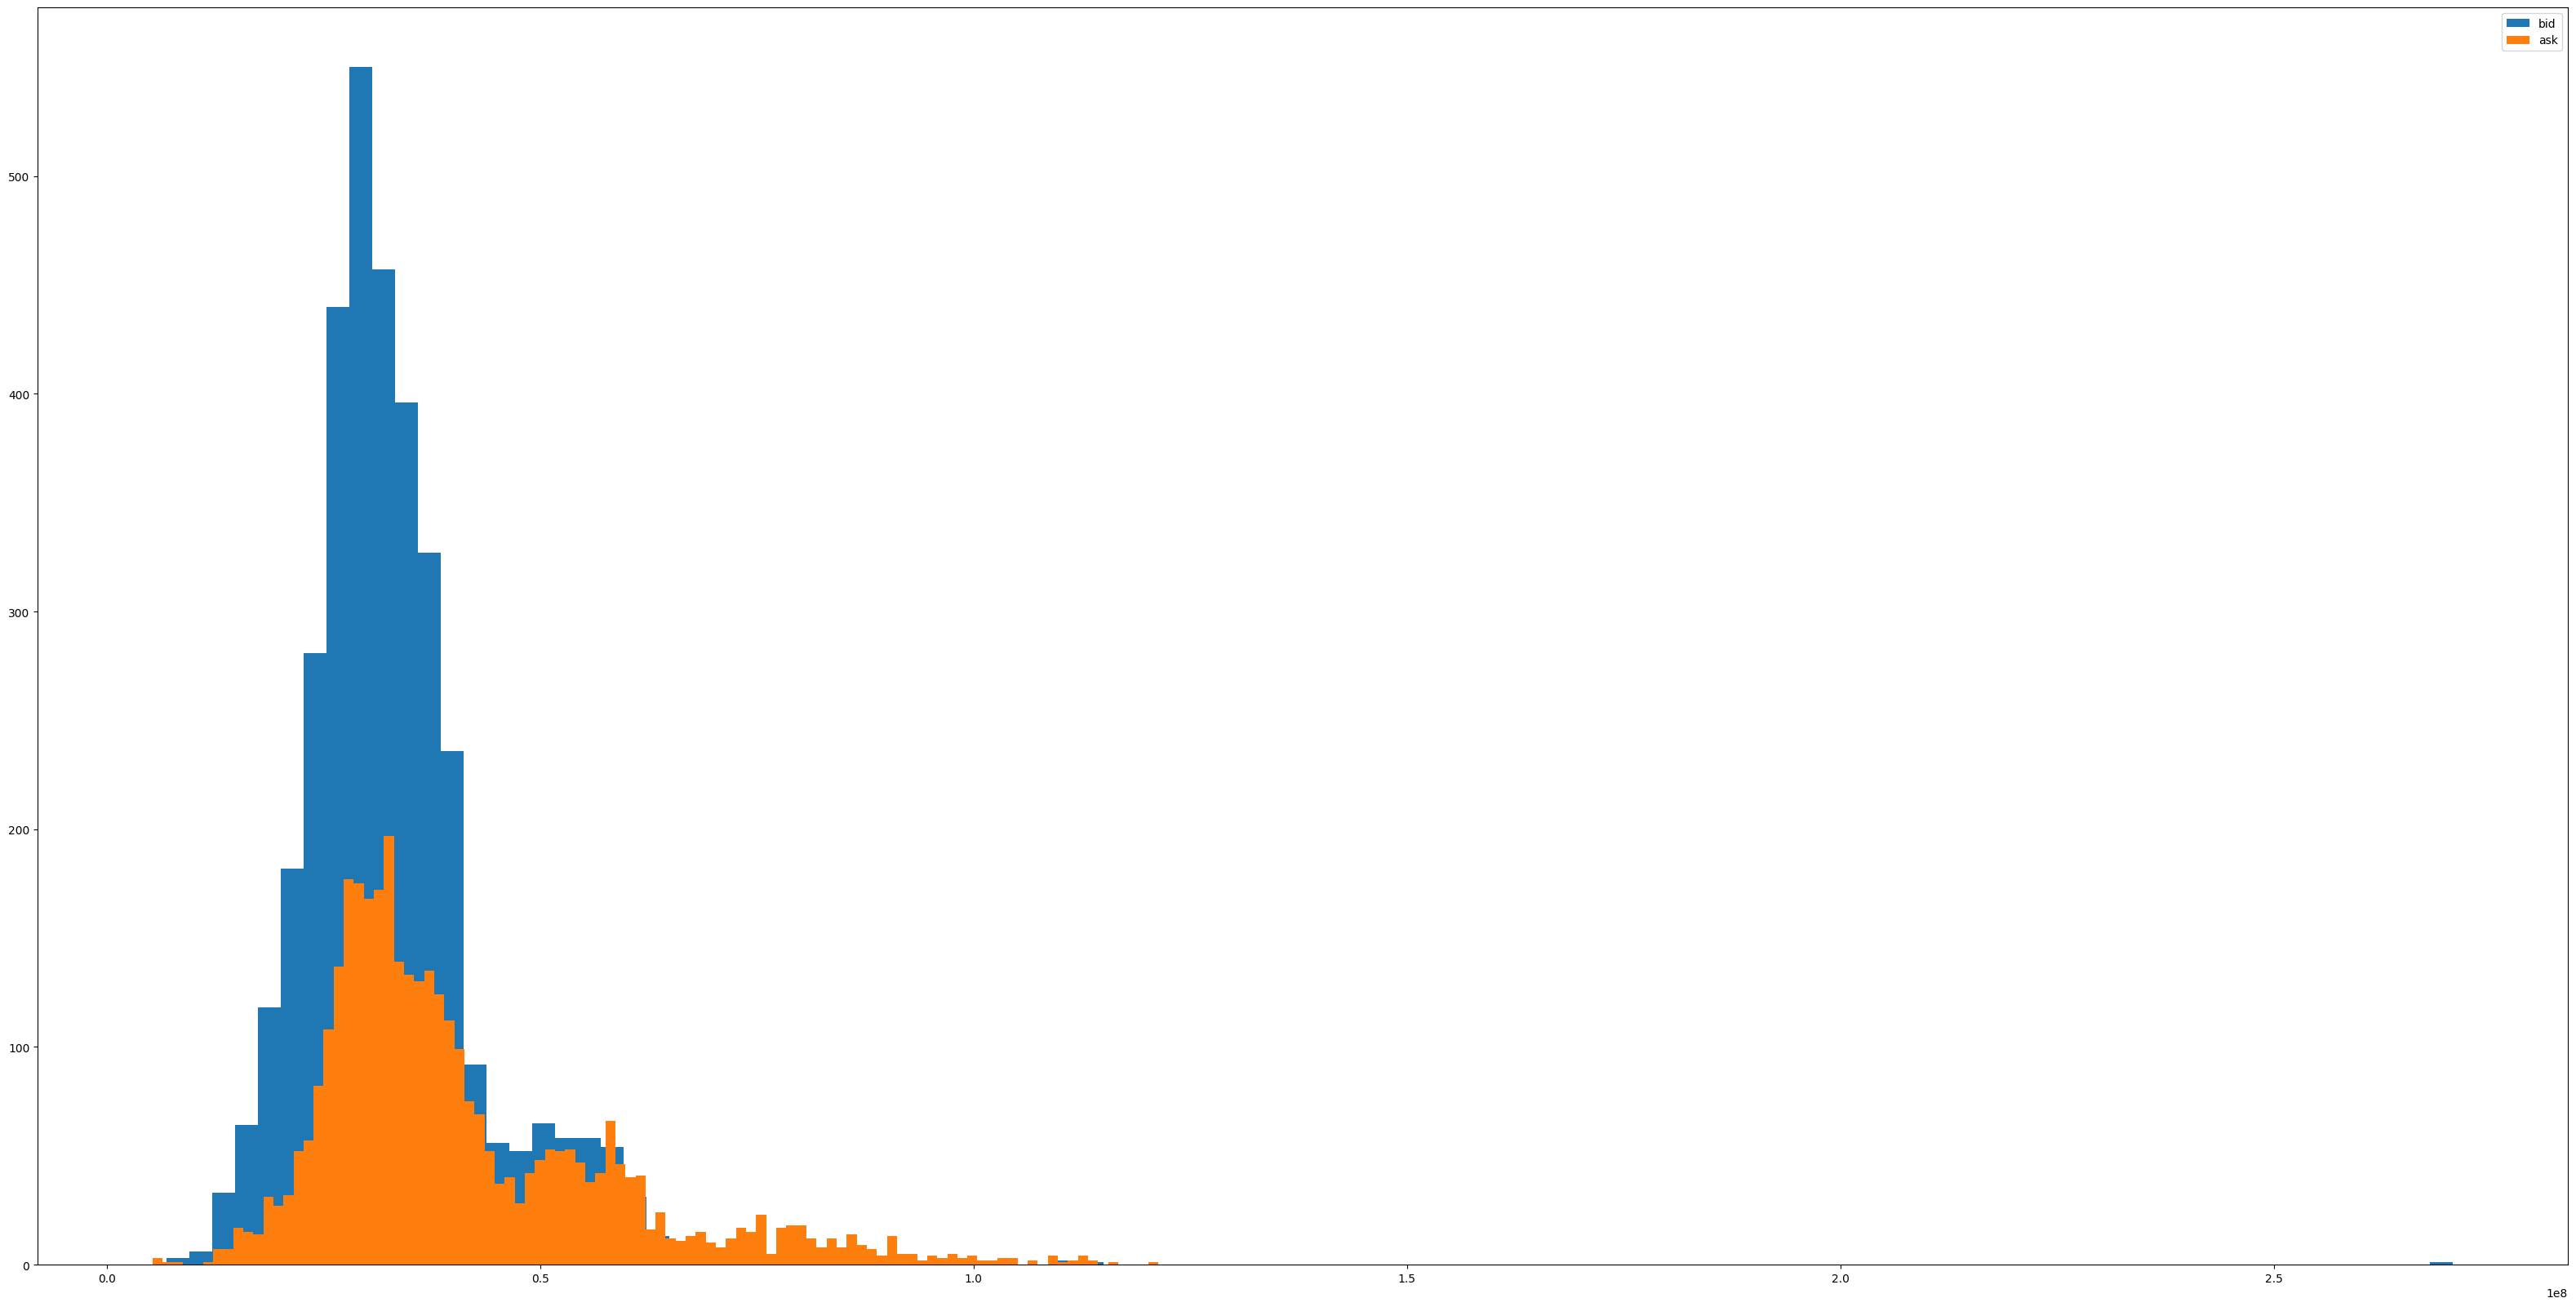

In [57]:
plt.hist(inputs['bid_liquidity'], bins=100, label='bid')
plt.hist(inputs['ask_liquidity'], bins=100, label='ask')
plt.legend()
plt.show()

### Investigating volatility

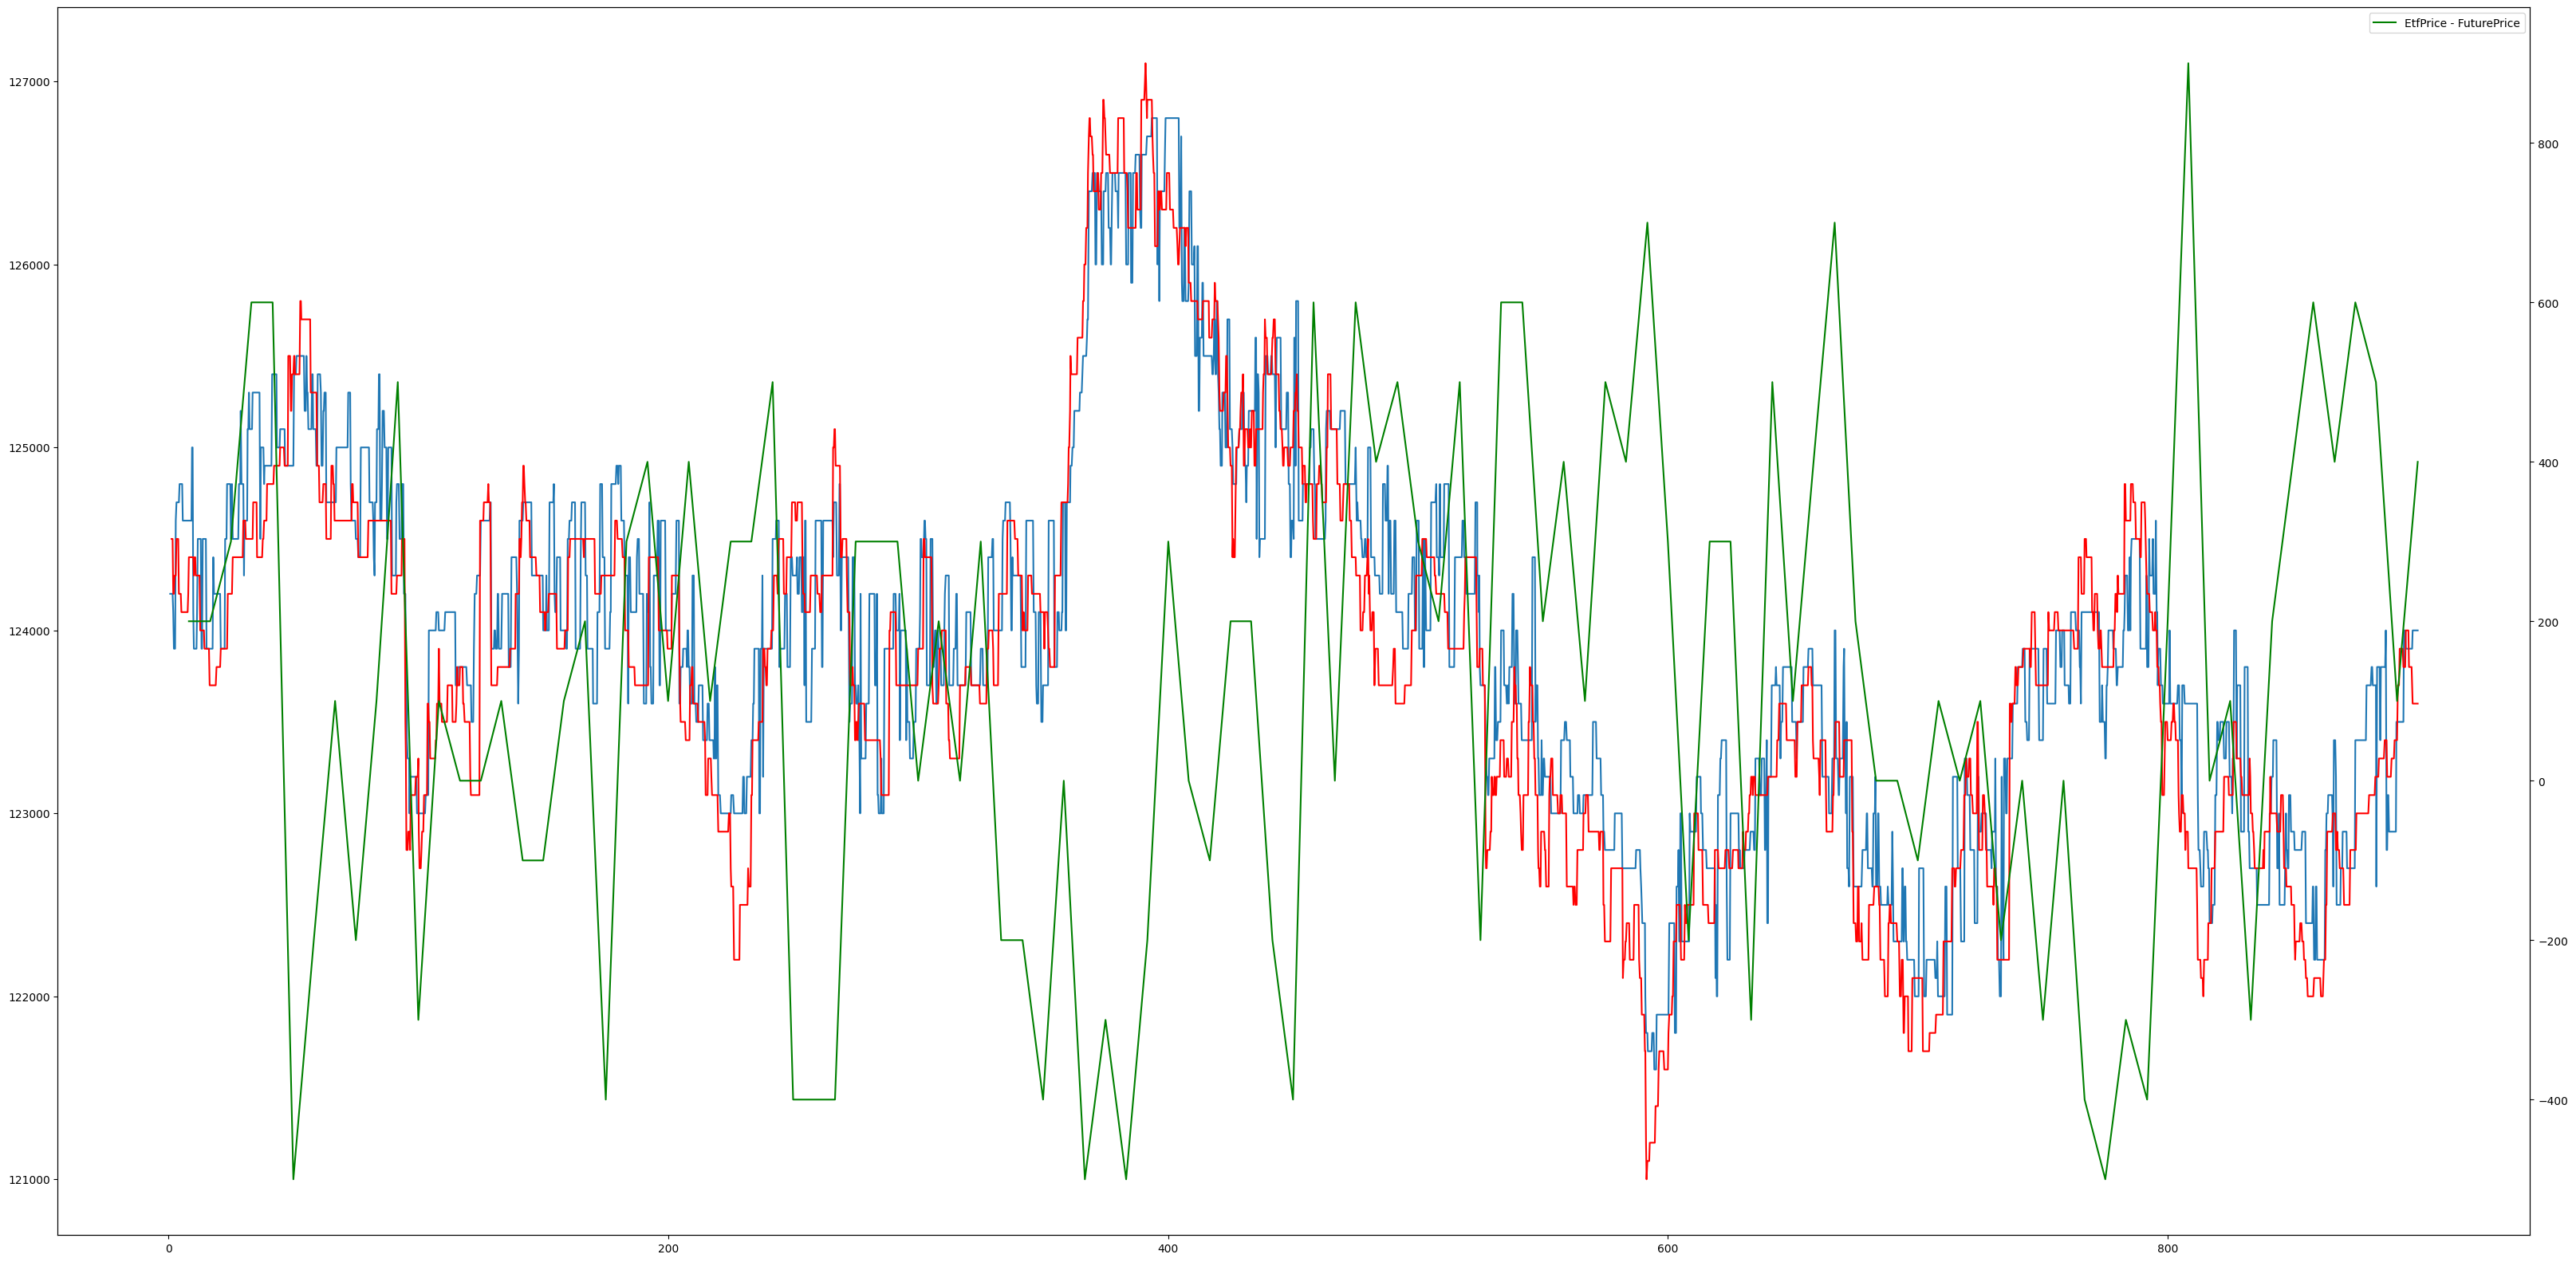

In [58]:
PL = pd.read_csv('../score_board.csv')
# drop first row of PL dataframe
PL = PL.drop(PL.index[0])
# plot EtfPrice and FuturePrice
plt.plot(PL['Time'], PL['EtfPrice'], label='EtfPrice')
plt.plot(PL['Time'], PL['FuturePrice'], label='FuturePrice', color='red')
# on a different axis plot the difference between EtfPrice and FuturePrice
ax2 = plt.twinx()
ax2.plot(PL['Time'][::100], PL['EtfPrice'][::100] - PL['FuturePrice'][::100], label='EtfPrice - FuturePrice', color='green')
# only plot every 100th row
plt.legend()
# increase the size of the plot
plt.rcParams["figure.figsize"] = (40,20)
plt.show()
